<a href="https://colab.research.google.com/github/VadbOss/Vadim-s_repa/blob/main/2_Lesson_%D0%9E%D1%81%D0%B8%D0%BF%D0%BE%D0%B2_%D0%92%D0%B0%D0%B4%D0%B8%D0%BC_%22movies_eda_2_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Разведочный анализ по датасету IMDb Movies: 5000 фильмов с наибольшим рейтингом. Часть 2: Анализ количественных и категориальных признаков, а также взаимосвязи признаков**

![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

***Задача:***
провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

**В части 2 задания необходимо:**
1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [ ]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
files.upload()

Saving movies_clean.csv to movies_clean.csv


{'movies_clean.csv': b',poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear\n0,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,The Shawshank Redemption,15,142 min,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,"(\'Tim Robbins\',), (\'Morgan Freeman\',), (\'Bob Gunton\',), (\'William Sadler\',)","26,26,905",$28.34M,142,2834\n3788,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close bond. They live together in the dormitory, where they plan their latest pranks. When a new headmaster arrives, the students naturally try to overthrow him. A comic war of nitwits follows.",Ertem Egilmez,"(\'Kemal Sunal\',), (\'M\xc3\xbcnir \xc3\x96zkul\',), (\'Halit Ak\xc3\xa7atepe\',), (\'Tarik Akan\',)","40,492",,87,\n9,https://m.media-a

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [ ]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [ ]:
dataset = pd.read_csv('/content/movies_clean.csv')

Проведите обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142,2834.0
1,3788,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,87,NaN
2,9,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,175,13497.0
3,32,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather: Part II,X,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"('Al Pacino',), ('Robert De Niro',), ('Robert ...","12,49,182",$57.30M,202,5730.0
4,24,https://m.media-amazon.com/images/S/sash/4Fyxw...,Schindler's List,15,195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"('Liam Neeson',), ('Ralph Fiennes',), ('Ben Ki...","13,33,407",$96.90M,195,9690.0


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [ ]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4970, 13)

Выведите информацию о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4970 non-null   object 
 1   title             4970 non-null   object 
 2   certificate       4970 non-null   object 
 3   runtime           4970 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            4970 non-null   float64
 6   about             4956 non-null   object 
 7   director          4970 non-null   object 
 8   stars             4970 non-null   object 
 9   votes             4970 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4970 non-null   int64  
 12  gross_earn_clear  4574 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 504.9+ KB


In [ ]:
#dataset = dataset.astype({'gross_earn_clear': 'Int64'})

**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [ ]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666.0 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [ ]:
dataset[dataset['gross_earn_clear']== 0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
540,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141,0.0
736,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94,0.0
1381,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110,0.0
1453,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ben X,15,93 min,"Drama, Thriller",7.3,As an alternative to getting bullied at school...,Nic Balthazar,"('Marijke Pinoy',), ('Greg Timmermans',), ('Ce...","18,943",$0.00M,93,0.0
1567,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108,0.0
2120,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92,0.0
2364,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108,0.0
3153,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",$0.00M,108,0.0
3332,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87,0.0
3638,https://m.media-amazon.com/images/S/sash/4Fyxw...,Chalet Girl,12A,97 min,"Comedy, Romance, Sport",6.2,Former skateboard champion Kim wants to make m...,Phil Traill,"('Felicity Jones',), ('Ed Westwick',), ('Bill ...","25,470",$0.00M,97,0.0


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [ ]:
gross_earn = dataset[dataset['gross_earn_clear'] != 0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666.0 Наименьший доход:  1.0


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [ ]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  4907.882623957877


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [ ]:
median_value = gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  2834.5


Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [ ]:
percentile_10_value = gross_earn.quantile(0.10)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.50)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.90)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  79.70000000000005
25-й процентиль доходов фильмов:  700.0
50-й процентиль доходов фильмов:  2834.5
75-й процентиль доходов фильмов:  6304.0
90-й процентиль доходов фильмов:  12196.800000000001


Выведите показатели описательной статистики с помощью метода describe()

In [ ]:
gross_earn.describe()

count     4558.000000
mean      4907.882624
std       6717.171723
min          1.000000
25%        700.000000
50%       2834.500000
75%       6304.000000
max      93666.000000
Name: gross_earn_clear, dtype: float64

Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#plt.style.available

Постройте диаграмму "ящик с усами" с помощью метода boxplot()

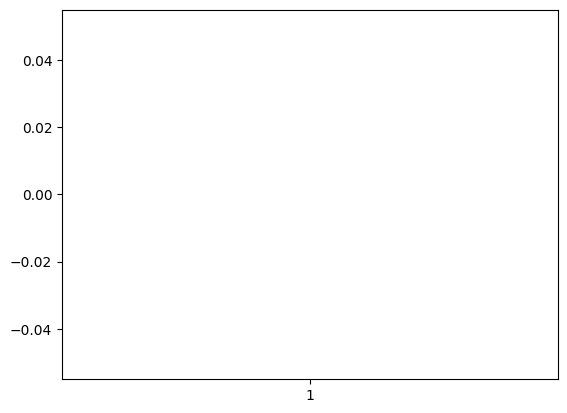

In [ ]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая. Попробуйте построить гистограмму с помощью метода hist(), чтобы понять, в чем может быть причина

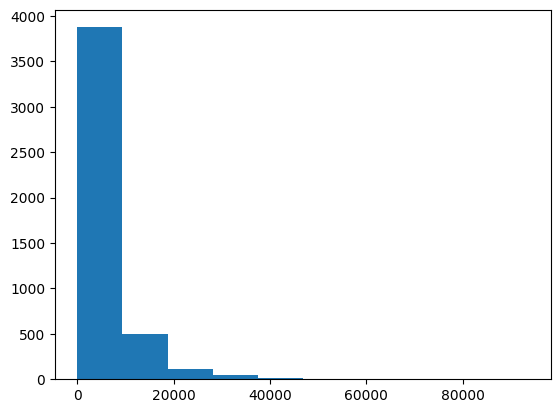

In [ ]:
plt.hist(gross_earn)
plt.show()

Гистограмма показывает, на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте "ящик с усами"

In [ ]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

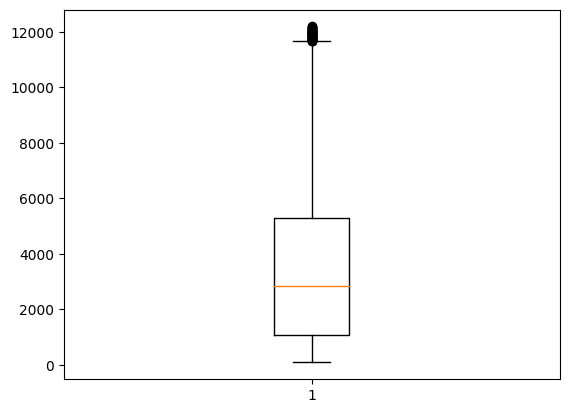

In [ ]:
plt.boxplot(gross_earn_2)
plt.show()

Также, заново постройте гистограмму, при этом передав в нее параметр bins=20 для лучшей визуализации

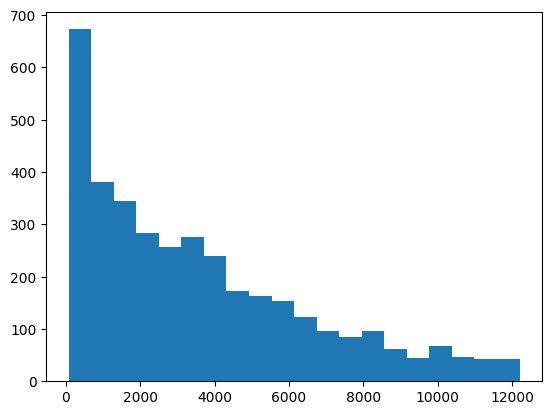

In [ ]:
plt.hist(gross_earn_2, bins= 20)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
2.   О нулевых значениях (их наличие, нужна ли предобработка).
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).

**Выводы:**

1. Максимальные и минимальные значения признака gross_earn_clear: 9366 и 0 соответственно.

2. Имеются нулевые значения признака в количестве 396 наблюдений.Проведена предобработка - нулевые данные наблюдения исключены.

3. Медиана и среднее значение составили 2834,5 и 4907,9 соответственно, - такой разброс в средних можно объяснить тем, что в датасете присутствует большое количество выбросов. О чем свидетельствуют графики Гистограммы и Боксплота!


4.
*   10-й процентиль доходов фильмов:  79
*   25-й процентиль доходов фильмов:  700
*   50-й процентиль доходов фильмов:  2834
*   75-й процентиль доходов фильмов:  6304
*   90-й процентиль доходов фильмов:  12196

5. Графический анализ, показывает, как сказано в п.3, -  ярко выраженные выбросы в данных, это видно из графика Боксплота (особенно) и графика Гистограммы. Исходя из чего - были исключены из датасета первые 10 и последние 10 процентилей наблюдений.


### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

In [ ]:
runtime = dataset['runtime_clear']

Максимальная и минимальная продолжительность фильмов

In [ ]:
max_time = runtime.max()
min_time = runtime.min()
print('Наибольшее время: ', max_time, 'Наименьшее время: ', min_time)

Наибольшее время:  366 Наименьшее время:  45


Средняя продолжительность фильмов

In [ ]:
mean_time = runtime.mean()
print('Средняя продолжительность фильма: ', mean_time)

Средняя продолжительность фильма:  110.26760563380282


Медиана продолжительности фильмов

In [ ]:
median_time = runtime.median()
print('Медиана продолжительности фильмов: ', median_time)

Медиана продолжительности фильмов:  106.0


Процентили (10, 25, 50, 75, 90) продолжительности фильмов

In [ ]:
percentile_10_time = runtime.quantile(0.10)
percentile_25_time = runtime.quantile(0.25)
percentile_50_time = runtime.quantile(0.50)
percentile_75_time = runtime.quantile(0.75)
percentile_90_time = runtime.quantile(0.90)
print('10-й процентиль продолжительности фильмов: ', percentile_10_time)
print('25-й процентиль продолжительности фильмов: ', percentile_25_time)
print('50-й процентиль продолжительности фильмов: ', percentile_50_time)
print('75-й процентиль продолжительности фильмов: ', percentile_75_time)
print('90-й процентиль продолжительности фильмов: ', percentile_90_time)

10-й процентиль продолжительности фильмов:  89.0
25-й процентиль продолжительности фильмов:  96.0
50-й процентиль продолжительности фильмов:  106.0
75-й процентиль продолжительности фильмов:  120.0
90-й процентиль продолжительности фильмов:  135.0


In [ ]:
runtime.describe()

count    4970.000000
mean      110.267606
std        21.441886
min        45.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       366.000000
Name: runtime_clear, dtype: float64

Построим диаграммы  признака runtime

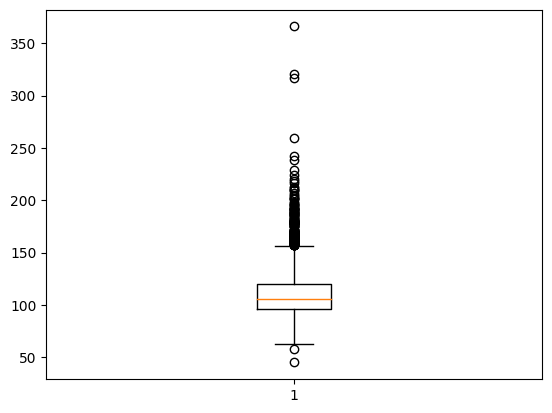

In [ ]:
plt.boxplot(runtime)
plt.show()

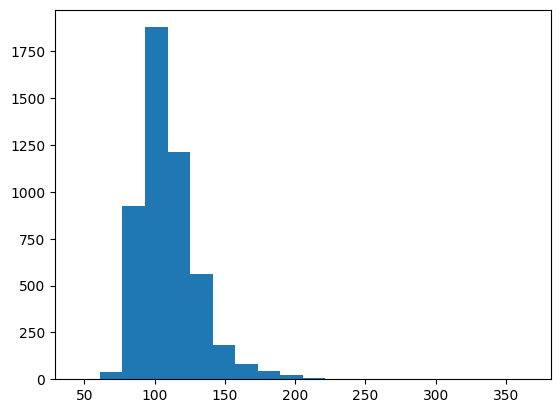

In [ ]:
plt.hist(runtime, bins= 20)
plt.show()

Построим диаграммы ограничив анализ 10 перцентилем снизу и 90 перцентилем сверху

In [ ]:
runtime_2 = dataset[
    (dataset['runtime_clear']>=percentile_10_time)&
    (dataset['runtime_clear']<=percentile_90_time)]['runtime_clear']

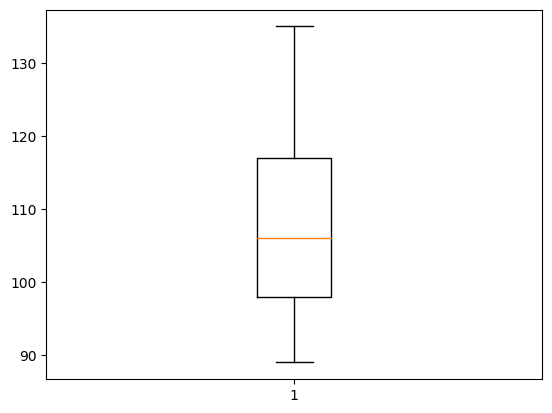

In [ ]:
plt.boxplot(runtime_2)
plt.show()

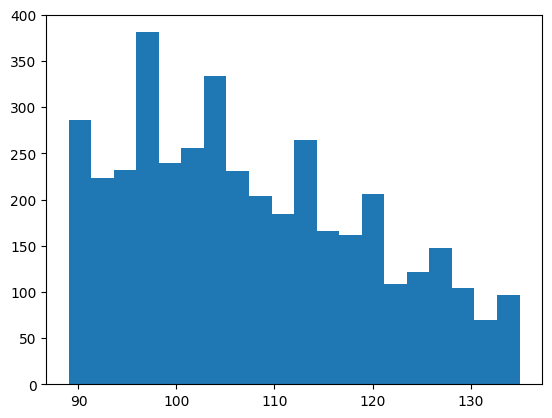

In [ ]:
plt.hist(runtime_2, bins= 20)
plt.show()

Выводы:

1. Минимальное время показа и максимальное по признаку runtime_clear - составляют 45 и 366 минут соответственно.

2. Нулевые значения отсутствуют.

3. Средняя продолжительность фильмов и медиана составили 110,3 и 106 минут соответственно. Близость этих значений объясняется отсутствием нулевых  и не критичными выбросами в этом признаке.

4.
* 10-й процентиль продолжительности фильмов:  89.0
* 25-й процентиль продолжительности фильмов:  96.0
* 50-й процентиль продолжительности фильмов:  106.0
* 75-й процентиль продолжительности фильмов:  120.0
* 90-й процентиль продолжительности фильмов:  135.0

5. Гистограмма и боксплот показывают наличие выбросов в значениях данного признака. По величине медианы и средней - можно сказать, что они (выбросы) не являются критичными в данном признаке.

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [ ]:
dataset['certificate'].describe()

count     4970
unique      15
top         15
freq      1843
Name: certificate, dtype: object

Изучите уникальные значения признака, получив их с помощью метода unique()

In [ ]:
dataset['certificate'].unique()

array(['15', '12A', 'X', 'U', '18', 'PG', '12', 'A', 'AA', 'R',
       'Not Rated', 'Rejected', 'UA', 'PG-13', '(Banned)'], dtype=object)

Проведите неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

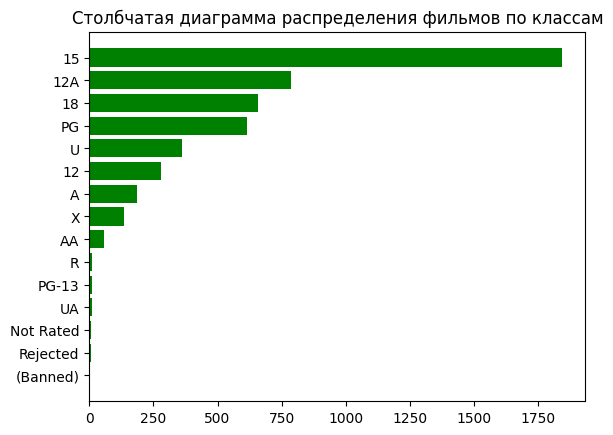

In [ ]:
plt.barh(certificate_counts.index, certificate_counts.values, color= 'g')
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]
certificate_counts_top_5

15     1843
12A     788
18      659
PG      614
U       362
Name: certificate, dtype: int64

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

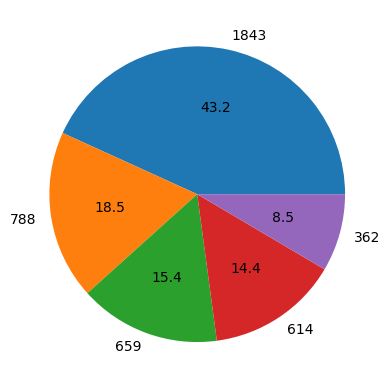

In [ ]:
plt.pie(certificate_counts_top_5, labels= certificate_counts_top_5.values, autopct='%.1f', )
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

1. Количество уникальных значений признака: 15
2. Часто встречаемое значение признака: '15' встретилось 1843 раза
3. Ниболее встречаемое значение: '15' - 1843 раза, наименее: '(Banned)' - 1 раз
4. Графический анализ графиков показывает: признак '15' составляет 43.2%, '12A' - 18.5%, '18' - 15.4%, 'PG' - 14.4%, 'U' - 8.5%.

### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

In [ ]:
dataset['rating'].describe()

count    4970.000000
mean        6.694004
std         0.967945
min         1.500000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.300000
Name: rating, dtype: float64

In [ ]:
dataset['rating'].nunique()

72

In [ ]:
dataset['rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7,
       6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4,
       5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1,
       4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.1, 3. , 2.9, 2.8, 2.6,
       2.5, 2.4, 2.3, 2.2, 2.1, 1.9, 1.5])

In [ ]:
dataset['rating'].value_counts()

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
      ... 
2.1      1
9.3      1
2.3      1
8.9      1
1.5      1
Name: rating, Length: 72, dtype: int64

In [ ]:
rating_counts = dataset['rating'].value_counts().sort_values(ascending= False)

<BarContainer object of 72 artists>

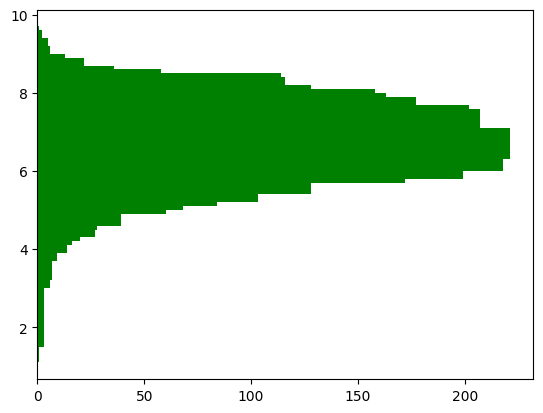

In [ ]:
plt.barh(rating_counts.index, rating_counts.values, color='g')

In [ ]:
rating_counts_top_5 = dataset['rating'].value_counts().head()

In [ ]:
rating_counts_top_5

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
Name: rating, dtype: int64

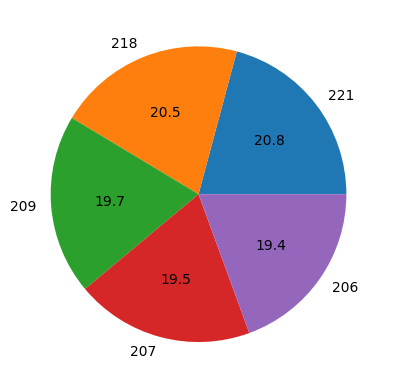

In [ ]:
plt.pie(rating_counts_top_5, labels=rating_counts_top_5.values, autopct='%.1f');

Выводы:

1. Количество уникальных значений признака - 72 раза;
2. Часто встречаемое значение рейтинга - 6,7;
3. Наибольший рейтинг составляет - 9,3, наименьший - 1,5;
4. Столбчатый график показывает, что распределение близко к нормальному, выбросов нет, нулевых значений нет. Круговая диаграмма показывает - ТОП-5 признаков практически равновелики.

### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



In [ ]:
dataset['director'].describe()

count            4970
unique           1954
top       Woody Allen
freq               38
Name: director, dtype: object

In [ ]:
dataset['director'].nunique()

1954

In [ ]:
dataset['director'].unique()

array(['Frank Darabont', 'Ertem Egilmez', 'Francis Ford Coppola', ...,
       'Roger Christian', 'Vondie Curtis-Hall', 'Tom Putnam'],
      dtype=object)

In [ ]:
dataset['director'].value_counts()

Woody Allen           38
Clint Eastwood        27
Steven Spielberg      27
Alfred Hitchcock      24
Ridley Scott          21
                      ..
Sebastian Schipper     1
Jerry Zaks             1
Kinji Fukasaku         1
Robin Swicord          1
Tom Putnam             1
Name: director, Length: 1954, dtype: int64

In [ ]:
t = dataset['director'].value_counts()
t[t.values == 1].sum()

1005

In [ ]:
rating_directors = dataset['director'].value_counts().sort_values(ascending= False)[:20]

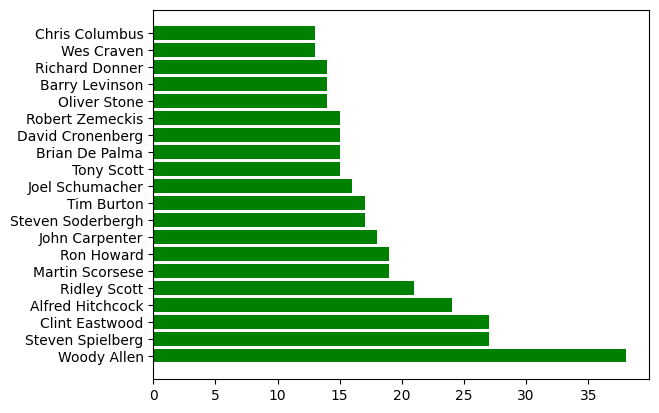

In [ ]:
plt.barh(rating_directors.index, rating_directors.values, color= 'g');

In [ ]:
rating_directors_top_5 = rating_directors[:5]

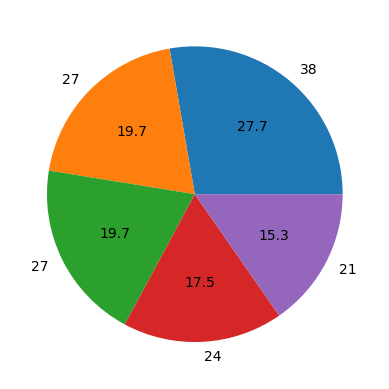

In [ ]:
plt.pie(rating_directors_top_5, labels= rating_directors_top_5.values, autopct= '%.1f');

Выводы:
1. Количество уникальных значений режиссеров в датасете 1954 человека;
2. Наиболее встречаем в датасете Woody Allen - 38 раз;
3. Наименее - 1005 человек по одному разу;
4. Столбчатый график показывает почти линейное уменьшение от максимального (38 раз) до минимального (1 раз) значений признака. Круговой график также малоинформативен ввиду большого количества значений признака. Топ5 показывает только одного лидера, остальные находятся в равновеликом положении. Графики малоинформативны в данном случае, более показательны аналитические показатели (value_counts, unique, сортировка этих показателей).

## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [ ]:
import seaborn as sns

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

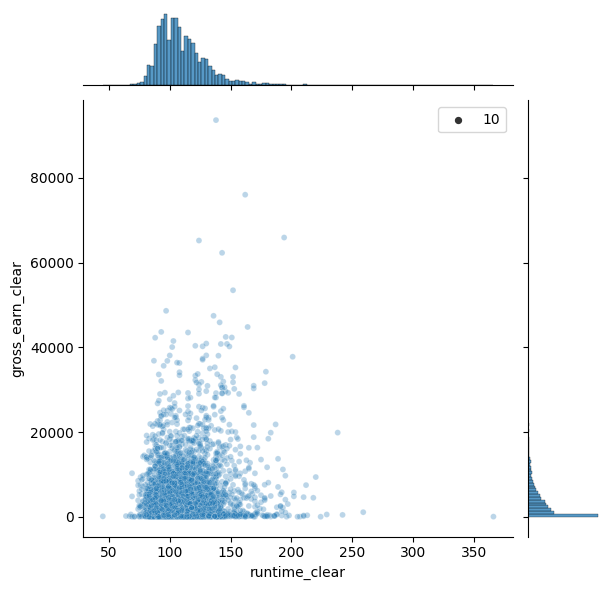

In [ ]:
sns.jointplot(x= dataset['runtime_clear'], y= dataset['gross_earn_clear'], size= 10, alpha= 0.3)
plt.show();

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

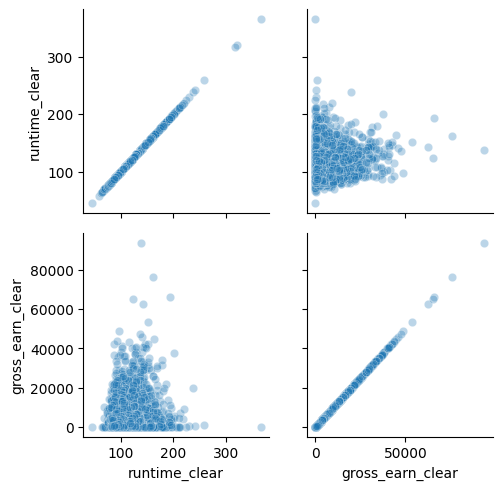

In [ ]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot, alpha= 0.3)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
new_dataset = dataset.copy()
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col] <= limiter]

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

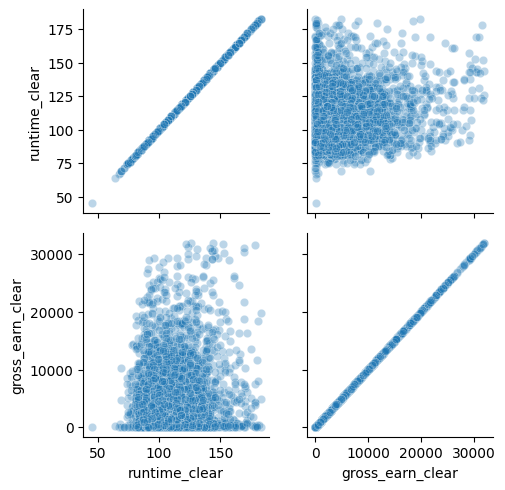

In [ ]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha = .3);

**Выводы:**

1. Прямой взаимосвязи не наблюдается (между доходами и временем показа фильмов).
* Фильмы с минимальными доходами можно увидеть по всей совокупности интервала времени (от 50 до 350 минут);
* Фильмы с доходами выше 17 000 распределены в диапазоне от 70 до 200 минут;
* Наибольшая плотность взаимосвязи наблюдается в квадранте (70 - 150 минут) по времени и (0 - 17 000) по доходам.

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [ ]:
directors = dataset['director'].unique()
len(directors)

1954

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].value_counts()

Woody Allen           38
Clint Eastwood        27
Steven Spielberg      27
Alfred Hitchcock      24
Ridley Scott          21
                      ..
Sebastian Schipper     1
Jerry Zaks             1
Kinji Fukasaku         1
Robin Swicord          1
Tom Putnam             1
Name: director, Length: 1954, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels = dataset['certificate'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'X': (1.0, 0.4980392156862745, 0.054901960784313725),
 'U': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'PG': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 '12': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Not Rated': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Rejected': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UA': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'PG-13': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

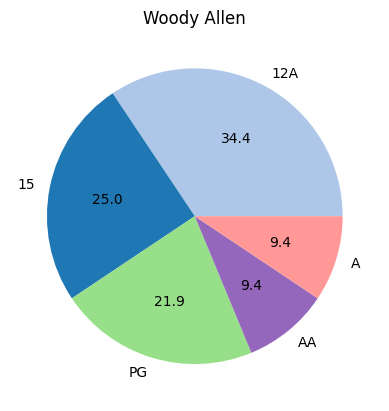

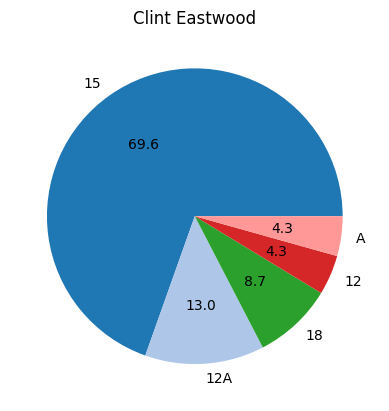

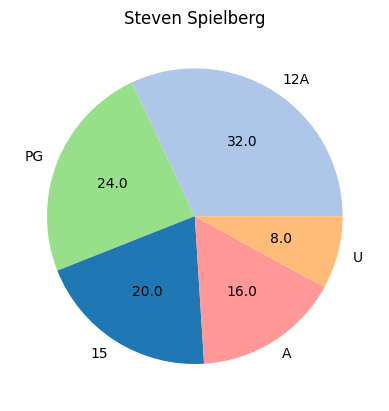

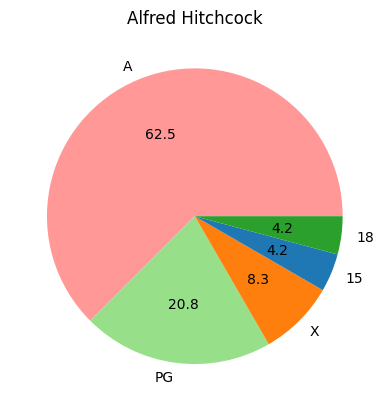

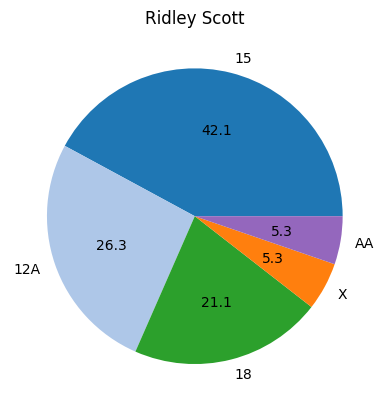

In [ ]:
for director in directors_top_5:
  df =  dataset[dataset['director'] == director]

  certificate_counts = df['certificate'].value_counts()[:5]
  labels = certificate_counts.index

  plt.title(director)
  plt.pie(certificate_counts.values, labels=labels, colors= [colors[key] for key in labels], autopct= '%.1f')
  plt.show()

**Выводы:**

1. Распределение признаков в 5 графиках абсолютно разное и по классу и по доле класса в общей доле по каждому режиссеру. У каждого режиссера абсолютно свой почерк - что и видно из распределения классов созданных ими фильмов.
2. У четырех из пяти режиссеров (кроме Alfred Hitchcock) в топ5 своих фильмов присутствуют фильмы класса '12A', '15' на лидирующих позициях (1, 2 места), Во всех 5 графиках присутствует 9 уникальных классов (из 15);
3. Первые 2 места по режиссеру и классу фильмов:
* Woody Allen: 12A (34.4%), 15 (25.0%);
* Clint Eastwood: 15 (69.6%), 12A (13%);
* Steven Spielberg: 12A (32.0%), PG (24.0%);
* Alfred Hitchcock: A (62.5%), PG (20.8%);
* Ridley Scott: 15 (42.1%), 12A (26.3%).

### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

In [ ]:
directors = dataset['director'].unique()
len(directors)

1954

In [ ]:
dataset['director'].value_counts()

Woody Allen           38
Clint Eastwood        27
Steven Spielberg      27
Alfred Hitchcock      24
Ridley Scott          21
                      ..
Sebastian Schipper     1
Jerry Zaks             1
Kinji Fukasaku         1
Robin Swicord          1
Tom Putnam             1
Name: director, Length: 1954, dtype: int64

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

In [ ]:
labels = dataset['rating'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{9.3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 9.2: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 9.0: (1.0, 0.4980392156862745, 0.054901960784313725),
 8.9: (1.0, 0.7333333333333333, 0.47058823529411764),
 8.8: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 8.7: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 8.6: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 8.5: (1.0, 0.596078431372549, 0.5882352941176471),
 8.4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 8.3: (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 8.2: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 8.1: (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 8.0: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 7.9: (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 7.8: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 7.7: (0.78039215686

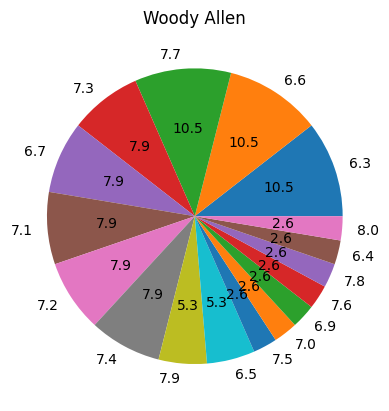

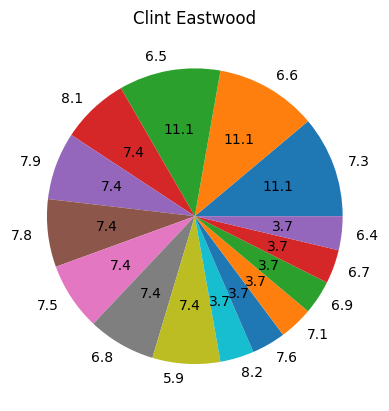

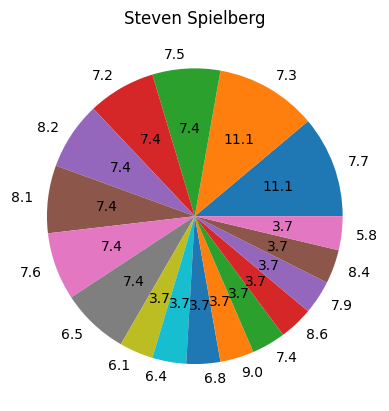

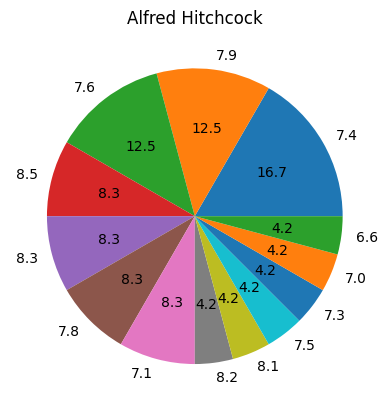

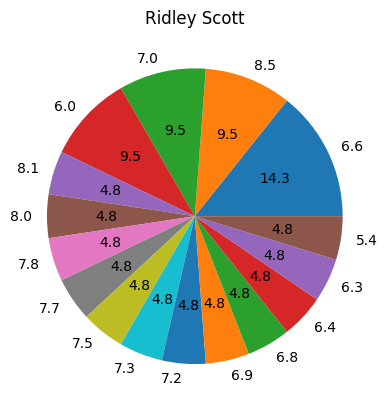

In [ ]:
for director in directors_top_5:
  df =  dataset[dataset['director'] == director]

  rating_counts = df['rating'].value_counts()
  labels = rating_counts.index

  plt.title(director)
  plt.pie(rating_counts.values, labels=labels, autopct= '%.1f')
  plt.show()

* Графики можно сделать из пяти категорий (ниже), при этом отсекается rating_counts = df['rating'].value_counts() ТОЛЬКО при помощи head() (при использовании[:5] - вызывается исключение!).

* Цветовая палитра из класса plt.cm.tab20 - реализует 20 цветов и при рейтинге 6,3 - этот показатель не включается в эти 20 цветов. Получается исключение, - поэтому этот параметр я не указываю в построении графиков (ниже).

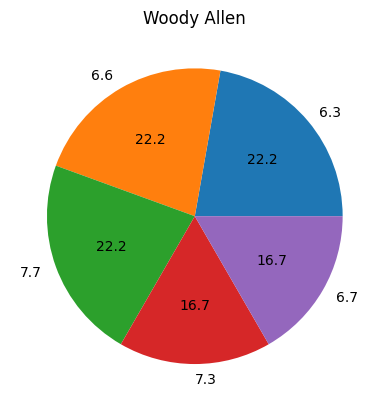

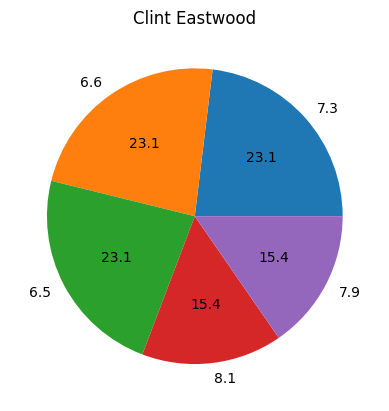

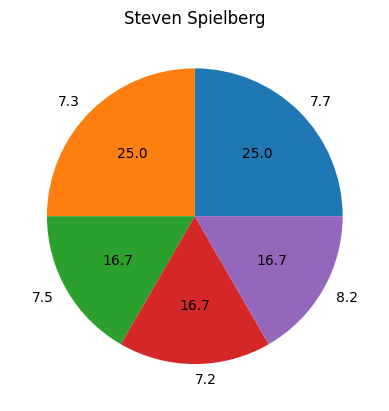

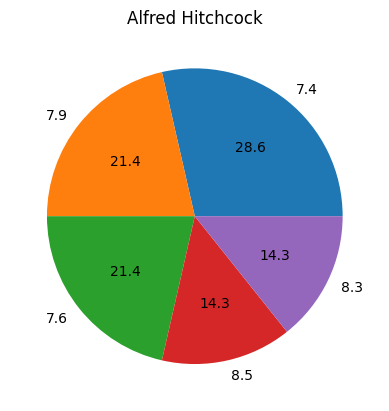

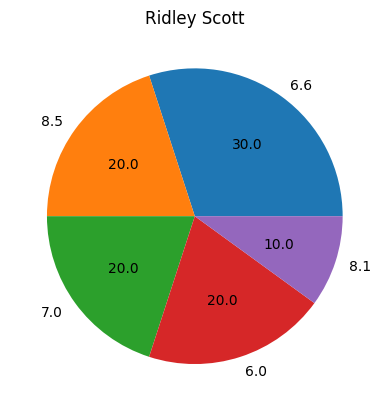

In [ ]:
for director in directors_top_5:
  df =  dataset[dataset['director'] == director]

  rating_counts = df['rating'].value_counts().head()
  labels = rating_counts.index

  plt.title(director)
  plt.pie(rating_counts.values, labels=labels, autopct= '%.1f')
  plt.show()

Выводы:
Первые три места по режиссерам:
* Woody Allen: 6,3 (22,2%), 6,6 (22,2%), 7,7 (22,2%);
* Clint Eastwood: 7.3 (23.1%), 6.6 (23.1%), 6.5 (23.1%);
* Steven Spielberg: 7.7 (25.0%), 7.3 (25.0%), 7.5 (16.7%);
* Alfred Hitchcock: 7.4 (28.6%), 7.9 (21.4%), 7.6 (21.4%);
* Ridley Scott: 6.6 (30.0%), 8.5 (20.0%), 7.0 (20.0%).

При изучении рейтингов пяти режиссеров определенной закономерности не просматривается. Диапазон укладывается в 6,3 - 8,5 в разных пропорциях.

### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

In [ ]:
certificate = dataset['certificate'].unique()
len(certificate)

15

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

In [ ]:
certificate_top_5 = dataset['certificate'].value_counts()[:5].index
certificate_top_5

Index(['15', '12A', '18', 'PG', 'U'], dtype='object')

In [ ]:
labels = dataset['rating'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{9.3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 9.2: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 9.0: (1.0, 0.4980392156862745, 0.054901960784313725),
 8.9: (1.0, 0.7333333333333333, 0.47058823529411764),
 8.8: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 8.7: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 8.6: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 8.5: (1.0, 0.596078431372549, 0.5882352941176471),
 8.4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 8.3: (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 8.2: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 8.1: (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 8.0: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 7.9: (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 7.8: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 7.7: (0.78039215686

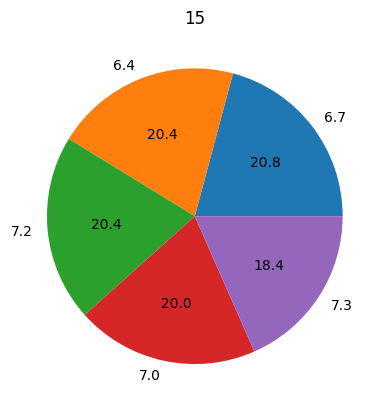

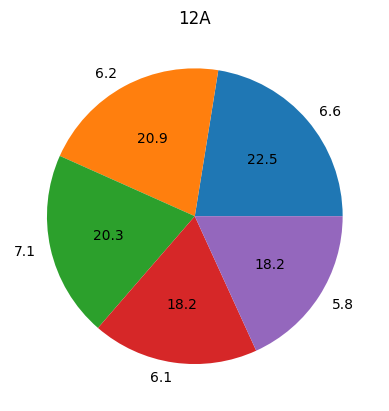

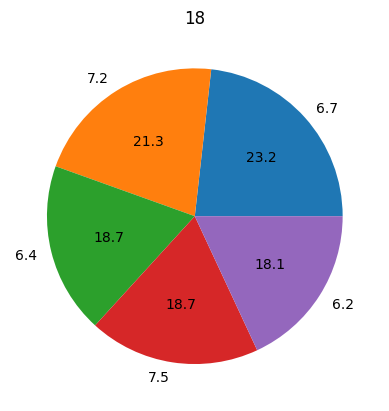

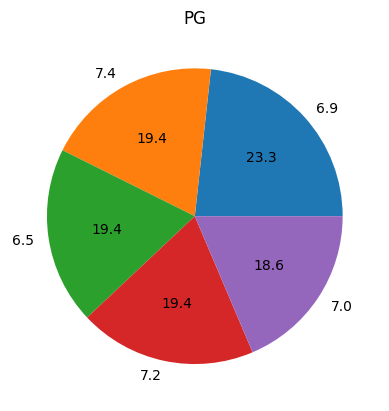

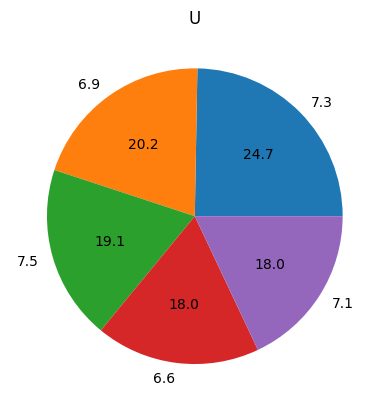

In [ ]:
for certificate in certificate_top_5:
  df =  dataset[dataset['certificate'] == certificate]

  certificate_counts = df['rating'].value_counts().head()
  labels = certificate_counts.index

  plt.title(certificate)
  plt.pie(certificate_counts.values, labels=labels, autopct= '%.1f')
  plt.show()

Выводы, первые три места рейтинга по классам:
* 15: 6.7 (20.8%), 6.4 (20.4%), 7.2 (20.4%);
* 12 A: 6.6 (22.5%), 6.2 (20.9%), 7.1 (20.3%);
* 18: 6.7 (23.2%), 7.2 (21.3%), 6.4 (18.7%);
* PG: 6.9 (23.3%), 7.4 (19.4%), 6.5 (19.4%);
* U: 7.3 (24.7%), 6.9 (20.2%), 7.5 (19.1%).
* При анализе параметров certificate - rating: можно сказать, что величина рейтинга в сертификате у каждого режиссера разная и общих закономерностей не просматривается. Диапазон величин рейтинга - от 6,4 до 7,5.

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].agg('median').sort_values(ascending= False)

certificate
U            5670.0
UA           5423.0
PG           4434.0
12A          4265.0
12           4158.0
AA           2762.0
15           1884.0
A            1614.0
18           1494.5
X            1475.0
PG-13         484.0
R             111.0
Not Rated       6.0
Rejected        5.0
(Banned)        NaN
Name: gross_earn_clear, dtype: float64

Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,269.0,6011.304833,6680.533197,4.0,2055.00,4158.0,7222.0,65933.0
12A,757.0,7731.092470,10026.104087,0.0,1527.00,4265.0,9500.0,93666.0
15,1719.0,3345.179756,4250.380908,0.0,361.00,1884.0,4587.0,36307.0
18,600.0,2660.720000,3463.902102,0.0,253.75,1494.5,3687.5,37078.0
A,126.0,3790.619048,5015.724423,1.0,339.25,1614.0,5124.5,26000.0
AA,52.0,3885.576923,3747.942198,2.0,727.00,2762.0,5763.5,13988.0
Not Rated,5.0,383.000000,823.137595,1.0,2.00,6.0,51.0,1855.0
PG,581.0,6401.135972,6677.289303,1.0,1860.00,4434.0,8106.0,40245.0


Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

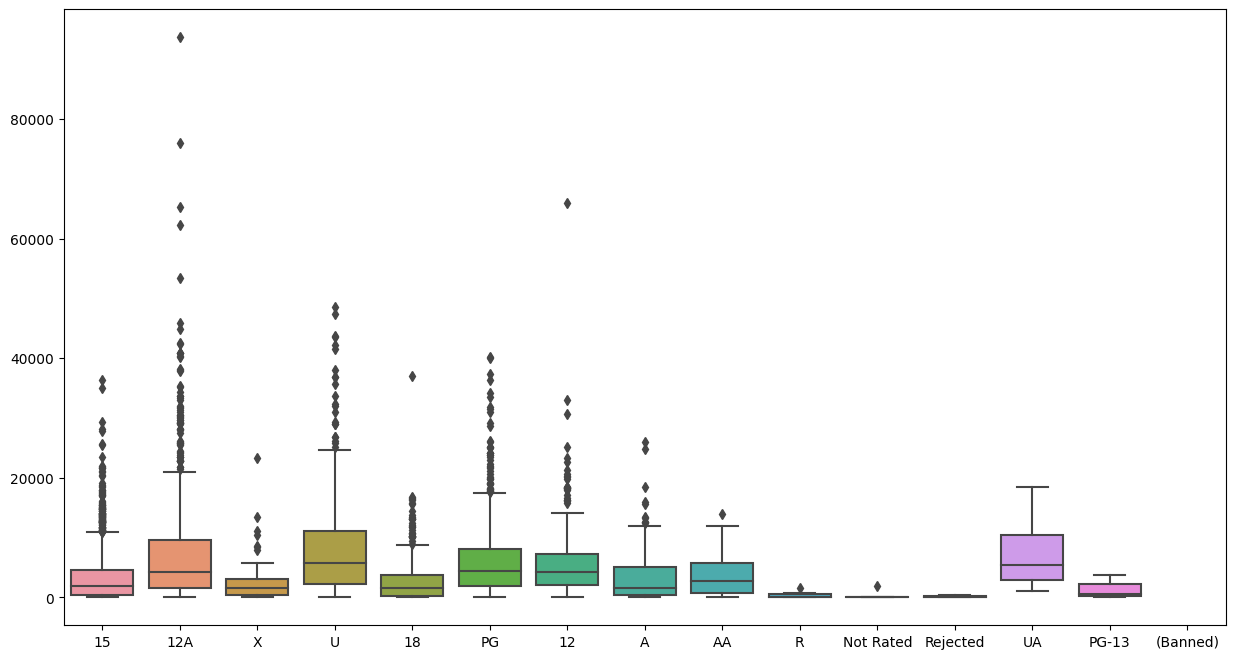

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x= dataset.certificate.values, y = dataset.gross_earn_clear.values, data= dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
certificate_list = dataset.certificate.value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object')

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax

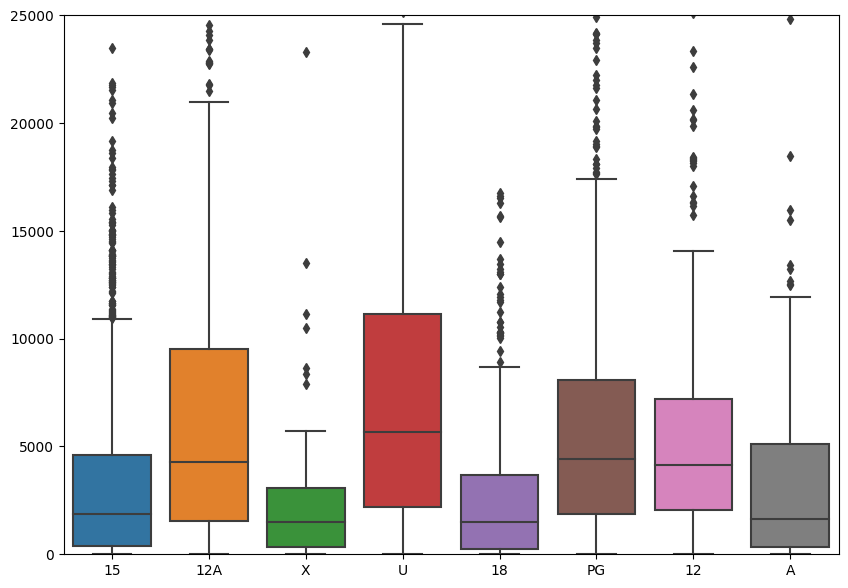

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x= dataset_certificate_top_8.certificate.values, y = dataset_certificate_top_8.gross_earn_clear.values, data= dataset_certificate_top_8)
plt.axis(ymin= 0, ymax= 25000)
plt.show()

Сводная по медианам ТОП_8

In [ ]:
dataset_certificate_top_8.groupby('certificate')['gross_earn_clear'].agg(['median', 'mean']).sort_values(by='median', ascending= False).round(1)

,median,mean
certificate,,
U,5670.0,8598.9
PG,4434.0,6401.1
12A,4265.0,7731.1
12,4158.0,6011.3
15,1884.0,3345.2
A,1614.0,3790.6
18,1494.5,2660.7
X,1475.0,2378.4


**Выводы:**

1. Взаимосвязи признаков из ТОП_8, по медиане, в целом, - не просматривается;
2. Из особенностей можно выделить две группы похожие между собой по медиане и рсапределению МКР. Первая группа: U, PG, 12A, 12. Вторая группа: 15, A, 18, X, - которая также похожа внутри себя и по медиане и по МКР;
3. Из ТОП_8 - медиана распределена равномерно увеличиваясь от 1475 (Х) до 1884 (15). Далее следует скачок ко второй группе от 4158 (12) до 5670 (U). Признак U имеет наибольшую медиану из всех представленных, а также самый большой МКР, что говорит об неоднородности структуры признака.
4. Статистически значимы ли медианные значения между собой - можно воспользовавшись методами сравнения групп (раздел Статистический анализ данных).

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

In [ ]:
dataset.groupby('certificate')['runtime_clear'].agg('median').sort_values(ascending= False)

certificate
UA           121.0
R            118.0
12A          112.0
A            110.0
AA           109.0
X            108.0
12           107.0
15           106.0
PG           105.0
18           104.0
U             96.0
Not Rated     95.0
PG-13         95.0
(Banned)      91.0
Rejected      84.0
Name: runtime_clear, dtype: float64

In [ ]:
dataset.groupby('certificate')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),1.0,91.000000,NaN,91.0,91.0,91.0,91.00,91.0
12,278.0,109.982014,18.809794,80.0,97.0,107.0,120.00,194.0
12A,788.0,115.449239,20.309016,75.0,100.0,112.0,127.00,213.0
15,1843.0,109.385241,18.523197,69.0,96.0,106.0,119.00,202.0
18,659.0,109.033384,21.216186,71.0,95.0,104.0,117.00,321.0
A,186.0,114.397849,26.469417,58.0,97.0,110.0,125.75,212.0
AA,59.0,114.949153,24.715920,85.0,98.0,109.0,124.50,205.0
Not Rated,7.0,103.000000,17.406895,87.0,92.0,95.0,110.50,134.0
PG,614.0,110.058632,23.005847,70.0,95.0,105.0,118.00,259.0


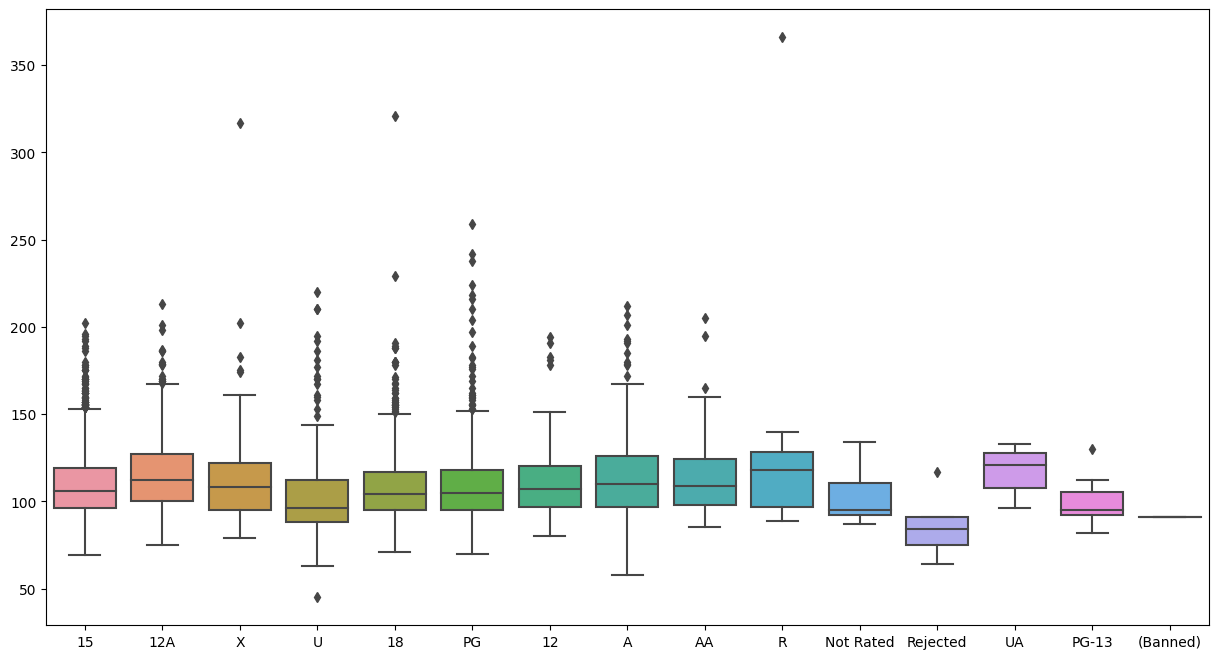

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x= dataset.certificate.values, y = dataset.runtime_clear.values, data= dataset)
plt.show()

Возьмем 8 классов, исключив остальные малозначимые

In [ ]:
certificate_list = dataset.certificate.value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object')

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

Посмотрим на графики с установлением лимита по оси Yдо 180 минут

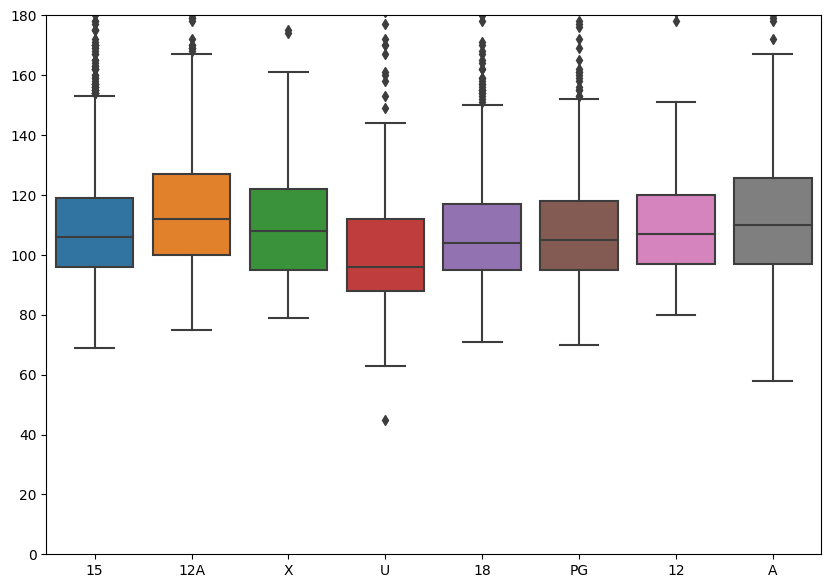

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x= dataset_certificate_top_8.certificate.values, y = dataset_certificate_top_8.runtime_clear.values, data= dataset_certificate_top_8)
plt.axis(ymin= 0, ymax= 180)
plt.show()

Сделаем сводник по медианам и средним

In [ ]:
dataset_certificate_top_8.groupby('certificate')['runtime_clear'].agg(['median', 'mean']).sort_values(by='median', ascending= False).round(1)

,median,mean
certificate,,
12A,112.0,115.4
A,110.0,114.4
X,108.0,112.4
12,107.0,110.0
15,106.0,109.4
PG,105.0,110.1
18,104.0,109.0
U,96.0,102.4


1. Имеется тесная взаимосвязь всех представленных признаков;
2. Из особенностей можно выделить  признак U, - имеет один выброс (ниже МКР) с величиной 45;
3. По всем признакам медиана лежит в диапазоне от 96 (U) до 112 (12A).
4. Статистическую значимость равенства (не равенства )медиан пока не даю.

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

In [ ]:
dataset.groupby('director')['gross_earn_clear'].agg('median').sort_values(ascending= False)

director
Joss Whedon          45901.0
Lee Unkrich          41500.0
Tim Miller           36307.0
Kyle Balda           33605.0
Colin Trevorrow      32814.0
                      ...   
Yilmaz Erdogan           NaN
Yoshiaki Kawajiri        NaN
Yoshifumi Kondô          NaN
Yôji Yamada              NaN
Ömer Faruk Sorak         NaN
Name: gross_earn_clear, Length: 1954, dtype: float64

In [ ]:
dataset.groupby('director')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
A.R. Murugadoss,1.0,243.0,NaN,243.0,243.0,243.0,243.0,243.0
Aamir Khan,1.0,122.0,NaN,122.0,122.0,122.0,122.0,122.0
Aanand L. Rai,1.0,88.0,NaN,88.0,88.0,88.0,88.0,88.0
Aaron Blaise,1.0,8534.0,NaN,8534.0,8534.0,8534.0,8534.0,8534.0
Aaron Schneider,1.0,918.0,NaN,918.0,918.0,918.0,918.0,918.0
...,...,...,...,...,...,...,...,...
Zal Batmanglij,1.0,227.0,NaN,227.0,227.0,227.0,227.0,227.0
Zaza Urushadze,1.0,14.0,NaN,14.0,14.0,14.0,14.0,14.0
Zoya Akhtar,1.0,311.0,NaN,311.0,311.0,311.0,311.0,311.0


Описательные статистики малоинформативны ввиду большого числа режиссеров - 1954

In [ ]:
dataset['director'].value_counts().head(10)

Woody Allen          38
Clint Eastwood       27
Steven Spielberg     27
Alfred Hitchcock     24
Ridley Scott         21
Martin Scorsese      19
Ron Howard           19
John Carpenter       18
Steven Soderbergh    17
Tim Burton           17
Name: director, dtype: int64

Проведем анализ по ТОП_10 режиссерам

In [ ]:
director_list = dataset.director.value_counts()[:10].index
director_list

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott', 'Martin Scorsese', 'Ron Howard', 'John Carpenter',
       'Steven Soderbergh', 'Tim Burton'],
      dtype='object')

In [ ]:
dataset_director_top_10 = dataset[dataset['director'].isin(director_list)].sort_values(by= 'director', ascending= False)
dataset_director_top_10.shape

(227, 13)

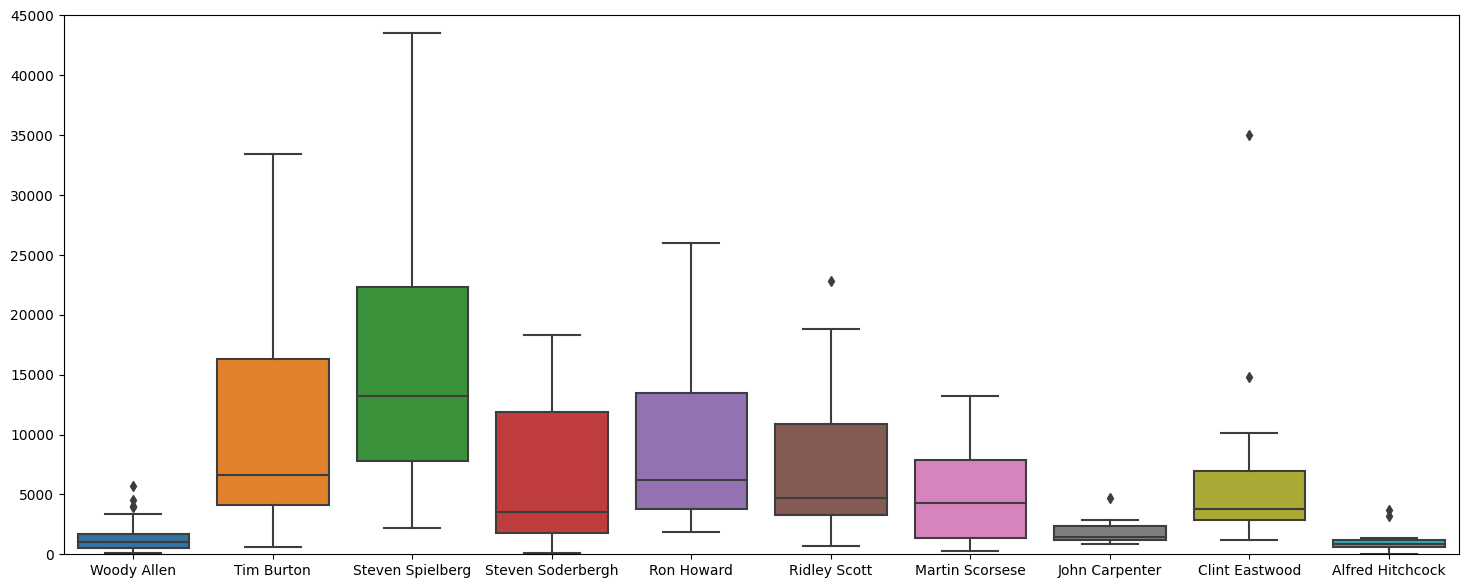

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxplot(x= dataset_director_top_10.director.values, y = dataset_director_top_10.gross_earn_clear.values, data= dataset_director_top_10)
plt.axis(ymin= 0, ymax= 45000)
plt.show()

In [ ]:
dataset_director_top_10.groupby('director')['gross_earn_clear'].agg(['median', 'mean']).sort_values(by='median', ascending= False).round(1)

,median,mean
director,,
Steven Spielberg,13207.0,15635.1
Tim Burton,6626.0,10308.2
Ron Howard,6210.0,9232.9
Ridley Scott,4740.0,7378.2
Martin Scorsese,4244.0,5169.0
Clint Eastwood,3749.0,5993.3
Steven Soderbergh,3543.5,6457.1
John Carpenter,1436.0,1883.1
Woody Allen,1058.0,1424.2


1. Взаимосвязь всех представленных признаков отсутствует;
2. Можно выделить четыре группы, которые схожи между собой по МКР и медиане:
* Woody Allen, John Carpenter, Alfred Hitchcock;
* Ridley Scott, Vartin Scorsese, Clint Eastwood;
* Tim Barton, Steven Spielberg, Ron Howard,
* Steven Soderberg
3. Особенно выделяется Steven Spielberg  с максимальной медианой 13207. Медиана распределена по четырем группам:
875 (Alfred Hitchcock) до 1436 (John Carpenter), следующая группа от 3543,5 (Steven Soderbergh	) до 4740 (Ridley Scott),  третья группа от 6210 (Ron Howard) до 6626 (Tim Burton), лидирует Steven Spielberg - 13207.

На мой взгляд данные параметры - можно анализировать не только с помощью медианы, но и средней арифметической.

### **9.4. director - runtime_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

In [ ]:
dataset.groupby('director')['runtime_clear'].agg('median').sort_values(ascending= False)

director
Marco Tullio Giordana    366.0
Ron Maxwell              259.0
Anurag Kashyap           232.5
Cecil B. DeMille         220.0
Ashutosh Gowariker       213.0
                         ...  
Clyde Bruckman            67.0
Samuel Armstrong          64.0
Makoto Shinkai            63.0
Robert Wiene              58.0
Buster Keaton             45.0
Name: runtime_clear, Length: 1954, dtype: float64

In [ ]:
dataset.groupby('director')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
A.R. Murugadoss,1.0,186.0,NaN,186.0,186.0,186.0,186.0,186.0
Aamir Khan,1.0,165.0,NaN,165.0,165.0,165.0,165.0,165.0
Aanand L. Rai,2.0,134.0,8.485281,128.0,131.0,134.0,137.0,140.0
Aaron Blaise,1.0,85.0,NaN,85.0,85.0,85.0,85.0,85.0
Aaron Schneider,1.0,103.0,NaN,103.0,103.0,103.0,103.0,103.0
...,...,...,...,...,...,...,...,...
Zal Batmanglij,1.0,116.0,NaN,116.0,116.0,116.0,116.0,116.0
Zaza Urushadze,1.0,87.0,NaN,87.0,87.0,87.0,87.0,87.0
Zoya Akhtar,1.0,155.0,NaN,155.0,155.0,155.0,155.0,155.0


Описательные статистики малоинформативны ввиду большого количества уникальных значений.

In [ ]:
dataset['director'].value_counts().head(10)

Woody Allen          38
Clint Eastwood       27
Steven Spielberg     27
Alfred Hitchcock     24
Ridley Scott         21
Martin Scorsese      19
Ron Howard           19
John Carpenter       18
Steven Soderbergh    17
Tim Burton           17
Name: director, dtype: int64

In [ ]:
director_list = dataset.director.value_counts()[:10].index
director_list

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott', 'Martin Scorsese', 'Ron Howard', 'John Carpenter',
       'Steven Soderbergh', 'Tim Burton'],
      dtype='object')

In [ ]:
dataset_director_top_10 = dataset[dataset['director'].isin(director_list)].sort_values(by= 'director', ascending= False)
dataset_director_top_10.shape

(227, 13)

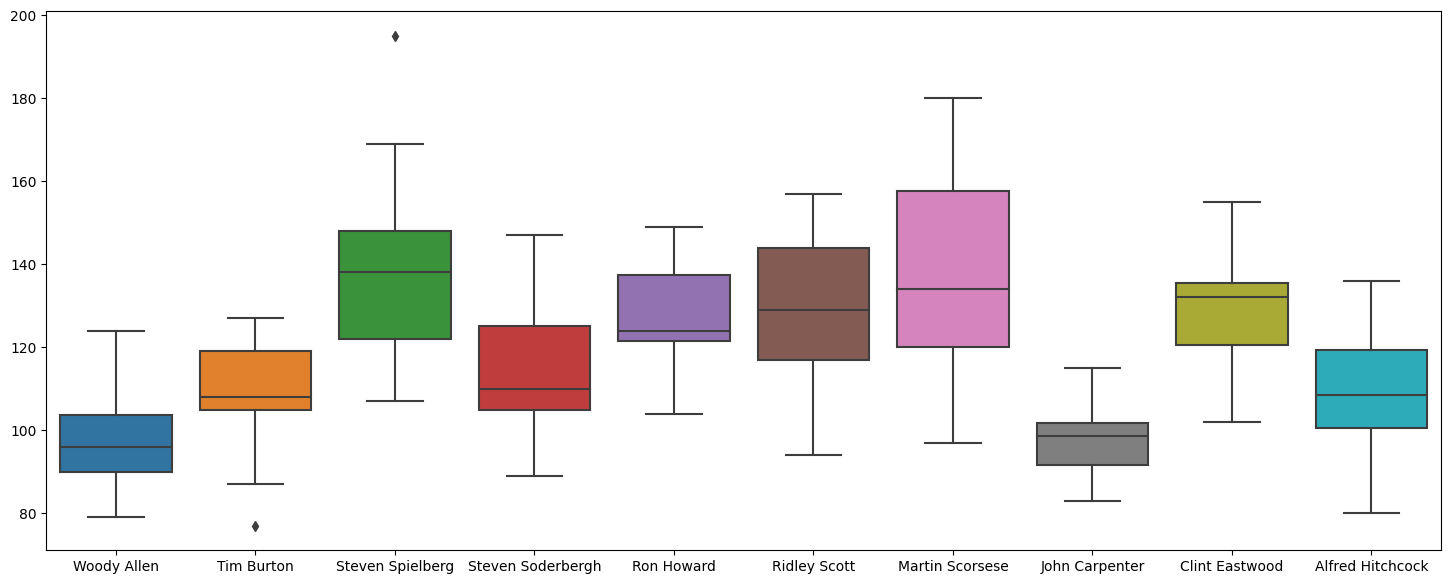

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxplot(x= dataset_director_top_10.director.values, y = dataset_director_top_10.runtime_clear.values, data= dataset_director_top_10)
#plt.axis(ymin= 0, ymax= 180)
plt.show()

Сводник

In [ ]:
dataset_director_top_10.groupby('director')['runtime_clear'].agg(['median', 'mean']).sort_values(by='median', ascending= False).round(1)

,median,mean
director,,
Steven Spielberg,138.0,137.3
Martin Scorsese,134.0,137.9
Clint Eastwood,132.0,128.7
Ridley Scott,129.0,131.3
Ron Howard,124.0,127.5
Steven Soderbergh,110.0,114.6
Alfred Hitchcock,108.5,109.7
Tim Burton,108.0,108.5
John Carpenter,98.5,98.3


1. Можно выделить две группы (см.выше) схожие по медиане и МКР:
* от 124 до 138 минут;
*  от 96 до до 110 включительно.
2. Общий размах составляет от 96 до 138 минут
3. Медиана и средняя очень близки, так как нет критичных выбросов.


### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

In [ ]:
dataset.groupby('rating')['gross_earn_clear'].agg('median').sort_values(ascending= False)

rating
8.8    30406.0
8.7    14174.0
9.2    13497.0
8.6    13074.0
8.9    10793.0
        ...   
2.6      771.0
8.1      582.0
1.9      492.0
2.3      427.0
2.9      241.0
Name: gross_earn_clear, Length: 72, dtype: float64

In [ ]:
dataset.groupby('rating')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1.5,1.0,911.0,NaN,911.0,911.00,911.0,911.00,911.0
1.9,3.0,638.0,719.201641,3.0,247.50,492.0,955.50,1419.0
2.1,1.0,1025.0,NaN,1025.0,1025.00,1025.0,1025.00,1025.0
2.2,1.0,1702.0,NaN,1702.0,1702.00,1702.0,1702.00,1702.0
2.3,1.0,427.0,NaN,427.0,427.00,427.0,427.00,427.0
...,...,...,...,...,...,...,...,...
8.8,6.0,22067.5,15543.346496,610.0,10091.75,30406.0,32657.25,34255.0
8.9,1.0,10793.0,NaN,10793.0,10793.00,10793.0,10793.00,10793.0
9.0,5.0,21425.4,23022.481899,436.0,5730.00,9690.0,37785.00,53486.0


In [ ]:
dataset['rating'].value_counts().head(10)

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
7.3    202
6.2    199
7.1    198
6.8    191
6.9    186
Name: rating, dtype: int64

Рейтинг представлен 72 уникальными значениями, ввиду этого можно проанализировать ТОП_10 величин рейтинга

In [ ]:
rating_list = dataset.rating.value_counts().head(10).index
rating_list

Float64Index([6.7, 6.4, 6.6, 7.2, 7.0, 7.3, 6.2, 7.1, 6.8, 6.9], dtype='float64')

In [ ]:
dataset_rating_top_10 = dataset[dataset['rating'].isin(rating_list)].sort_values(by= 'rating', ascending= False)
dataset_rating_top_10.shape

(2037, 13)

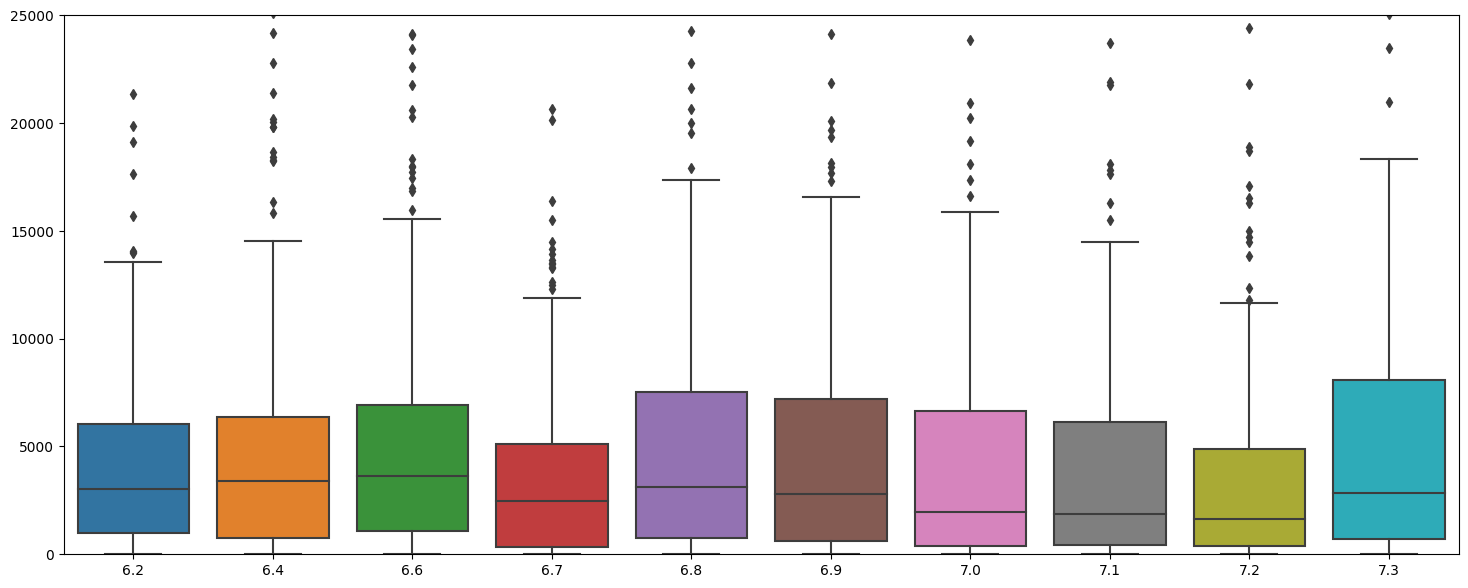

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxplot(x= dataset_rating_top_10.rating.values, y = dataset_rating_top_10.gross_earn_clear.values, data= dataset_rating_top_10)
plt.axis(ymin= 0, ymax= 25000)
plt.show()

In [ ]:
dataset_rating_top_10.groupby('rating')['gross_earn_clear'].agg(['median', 'mean']).sort_values(by='median', ascending= False).round(1)

,median,mean
rating,,
6.6,3624.5,5393.8
6.4,3395.0,5228.4
6.8,3137.5,5006.7
6.2,3032.0,4594.0
7.3,2824.5,5873.5
6.9,2781.0,5431.2
6.7,2476.0,3591.0
7.0,1961.0,4484.2
7.1,1887.0,4512.2


1. Все графики в ТОП_10 рейтинга по медиане, по средним, по МКР лежат в двух группах:
* 6.6, 7.3, 6.8, 6.4, 6.2, 6.9, 6.7;
* 7.0, 7.1, 7.2
Насколько медианы в группах равны и статистически значимы ли они - в этом разделе мы не учитываем.

Выбросы имеются во всех категориях.



### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

In [ ]:
dataset.groupby('rating')['runtime_clear'].agg('median').sort_values(ascending= False)

rating
9.0    195.0
8.9    154.0
8.8    148.0
9.3    142.0
8.4    135.5
       ...  
4.1     89.0
1.5     88.0
1.9     87.0
3.3     85.5
2.8     83.5
Name: runtime_clear, Length: 72, dtype: float64

In [ ]:
dataset.groupby('rating')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1.5,1.0,88.000000,NaN,88.0,88.0,88.0,88.0,88.0
1.9,3.0,86.333333,5.033223,81.0,84.0,87.0,89.0,91.0
2.1,1.0,90.000000,NaN,90.0,90.0,90.0,90.0,90.0
2.2,1.0,94.000000,NaN,94.0,94.0,94.0,94.0,94.0
2.3,1.0,104.000000,NaN,104.0,104.0,104.0,104.0,104.0
...,...,...,...,...,...,...,...,...
8.8,6.0,155.666667,18.029605,139.0,143.5,148.0,170.5,179.0
8.9,1.0,154.000000,NaN,154.0,154.0,154.0,154.0,154.0
9.0,5.0,169.200000,45.844302,96.0,152.0,195.0,201.0,202.0


In [ ]:
dataset['rating'].value_counts().head(10)

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
7.3    202
6.2    199
7.1    198
6.8    191
6.9    186
Name: rating, dtype: int64

In [ ]:
rating_list = dataset.rating.value_counts().head(10).index
rating_list

Float64Index([6.7, 6.4, 6.6, 7.2, 7.0, 7.3, 6.2, 7.1, 6.8, 6.9], dtype='float64')

In [ ]:
dataset_rating_top_10 = dataset[dataset['rating'].isin(rating_list)].sort_values(by= 'rating', ascending= False)
dataset_rating_top_10.shape

(2037, 13)

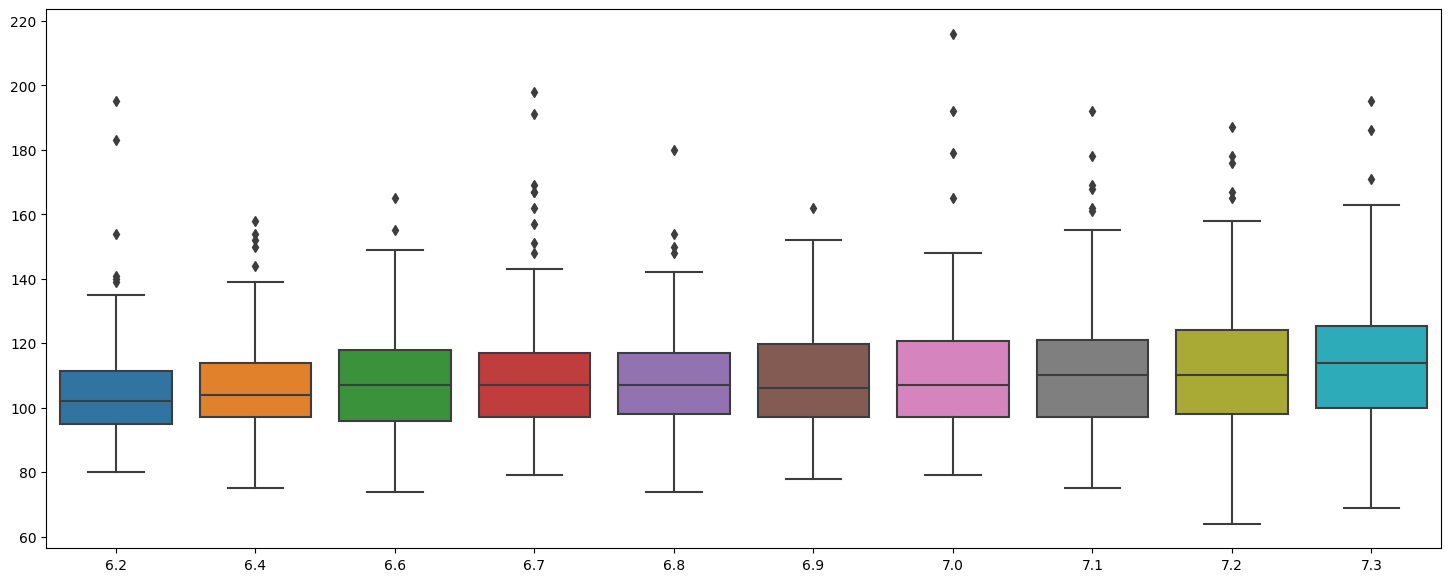

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxplot(x= dataset_rating_top_10.rating.values, y = dataset_rating_top_10.runtime_clear.values, data= dataset_rating_top_10)
#plt.axis(ymin= 0, ymax= 25000)
plt.show()

In [ ]:
dataset_rating_top_10.groupby('rating')['runtime_clear'].agg(['median', 'mean']).sort_values(by='median', ascending= False).round(1)

,median,mean
rating,,
7.3,114.0,113.7
7.1,110.0,111.5
7.2,110.0,112.8
6.6,107.0,108.8
6.7,107.0,109.2
6.8,107.0,108.5
7.0,107.0,110.1
6.9,106.0,108.5
6.4,104.0,106.5


* График зависимости rating - runtime_clear является однородным.
* Диапазон медианных величин и рейтинга ТОП_10 практически идентичен.
* Минимальные и максимальные значения: 102.0 - 114.0
* Можно было проверить по статистическим формулам статистическую значимость равенства медиан группы.

## 10. Общий вывод

Соберите промежуточные выводы в итоговый вывод по разведочному анализу

1. Максимальные и минимальные значения признака gross_earn_clear: 9366 и 0 соответственно.

2. Имеются нулевые значения признака в количестве 396 наблюдений.Проведена предобработка - нулевые данные наблюдения исключены.

3. Медиана и среднее значение составили 2834,5 и 4907,9 соответственно, - такой разброс в средних можно объяснить тем, что в датасете присутствует большое количество выбросов. О чем свидетельствуют графики Гистограммы и Боксплота!


4.
*   10-й процентиль доходов фильмов:  79
*   25-й процентиль доходов фильмов:  700
*   50-й процентиль доходов фильмов:  2834
*   75-й процентиль доходов фильмов:  6304
*   90-й процентиль доходов фильмов:  12196

5. Графический анализ, показывает, как сказано в п.3, -  ярко выраженные выбросы в данных, это видно из графика Боксплота (особенно) и графика Гистограммы. Исходя из чего - были исключены из датасета первые 10 и последние 10 процентилей наблюдений.


1. Минимальное время показа и максимальное по признаку runtime_clear - составляют 45 и 366 минут соответственно.

2. Нулевые значения отсутствуют.

3. Средняя продолжительность фильмов и медиана составили 110,3 и 106 минут соответственно. Близость этих значений объясняется отсутствием нулевых  и не критичными выбросами в этом признаке.

4.
* 10-й процентиль продолжительности фильмов:  89.0
* 25-й процентиль продолжительности фильмов:  96.0
* 50-й процентиль продолжительности фильмов:  106.0
* 75-й процентиль продолжительности фильмов:  120.0
* 90-й процентиль продолжительности фильмов:  135.0

5. Гистограмма и боксплот показывают наличие выбросов в значениях данного признака. По величине медианы и средней - можно сказать, что они (выбросы) не являются критичными в данном признаке.



6.1 certificate

1. Количество уникальных значений признака: 15
2. Часто встречаемое значение признака: '15' встретилось 1843 раза
3. Ниболее встречаемое значение: '15' - 1843 раза, наименее: '(Banned)' - 1 раз
4. Графический анализ графиков показывает: признак '15' составляет 43.2%, '12A' - 18.5%, '18' - 15.4%, 'PG' - 14.4%, 'U' - 8.5%.

6.2. rating

1. Количество уникальных значений признака - 72 раза;
2. Часто встречаемое значение рейтинга - 6,7;
3. Наибольший рейтинг составляет - 9,3, наименьший - 1,5;
4. Столбчатый график показывает, что распределение близко к нормальному, выбросов нет, нулевых значений нет. 4. Столбчатый график показывает, что распределение близко к нормальному, выбросов нет, нулевых значений нет. Круговая диаграмма показывает - ТОП-5 признаков практически равновелики.


6.3. director

1. Количество уникальных значений режиссеров в датасете 1954 человека;
2. Наиболее встречаем в датасете Woody Allen - 38 раз;
3. Наименее - 1005 человек по одному разу;
4. Столбчатый график показывает почти линейное уменьшение от максимального (38 раз) до минимального (1 раз) значений признака. Круговой график также малоинформативен ввиду большого количества значений признака. Топ5 показывает только одного лидера, остальные находятся в равновеликом положении. Графики малоинформативны в данном случае, более показательны аналитические показатели (value_counts, unique, сортировка этих показателей).


7.1. runtime_clear - gross_earn_clear

1. Прямой взаимосвязи не наблюдается (между доходами и временем показа фильмов).
* Фильмы с минимальными доходами можно увидеть по всей совокупности интервала времени (от 50 до 350 минут);
* Фильмы с доходами выше 17 000 распределены в диапазоне от 70 до 200 минут;
* Наибольшая плотность взаимосвязи наблюдается в квадранте (70 - 150 минут) по времени и (0 - 17 000) по доходам.


8.1. director - certificate

1. Распределение признаков в 5 графиках абсолютно разное и по классу и по доле класса в общей доле по каждому режиссеру. У каждого режиссера абсолютно свой почерк - что и видно из распределения классов созданных ими фильмов.
2. У четырех из пяти режиссеров (кроме Alfred Hitchcock) в топ5 своих фильмов присутствуют фильмы класса '12A', '15' на лидирующих позициях (1, 2 места), Во всех 5 графиках присутствует 9 уникальных классов (из 15);
3. Первые 2 места по режиссеру и классу фильмов:
* Woody Allen: 12A (34.4%), 15 (25.0%);
* Clint Eastwood: 15 (69.6%), 12A (13%);
* Steven Spielberg: 12A (32.0%), PG (24.0%);
* Alfred Hitchcock: A (62.5%), PG (20.8%);
* Ridley Scott: 15 (42.1%), 12A (26.3%).


8.2. director - rating

Первые три места по режиссерам:
* Woody Allen: 6,3 (22,2%), 6,6 (22,2%), 7,7 (22,2%);
* Clint Eastwood: 7.3 (23.1%), 6.6 (23.1%), 6.5 (23.1%);
* Steven Spielberg: 7.7 (25.0%), 7.3 (25.0%), 7.5 (16.7%);
* Alfred Hitchcock: 7.4 (28.6%), 7.9 (21.4%), 7.6 (21.4%);
* Ridley Scott: 6.6 (30.0%), 8.5 (20.0%), 7.0 (20.0%).

При изучении рейтингов пяти режиссеров определенной закономерности не просматривается. Диапазон укладывается в 6,3 - 8,5 в разных пропорциях.


8.3. certificate - rating

Выводы, первые три места рейтинга по классам:
* 15: 6.7 (20.8%), 6.4 (20.4%), 7.2 (20.4%);
* 12 A: 6.6 (22.5%), 6.2 (20.9%), 7.1 (20.3%);
* 18: 6.7 (23.2%), 7.2 (21.3%), 6.4 (18.7%);
* PG: 6.9 (23.3%), 7.4 (19.4%), 6.5 (19.4%);
* U: 7.3 (24.7%), 6.9 (20.2%), 7.5 (19.1%).
* При анализе параметров certificate - rating: При анализе параметров certificate - rating: можно сказать, что величина рейтинга в сертификате у каждого режиссера разная и общих закономерностей не просматривается. Диапазон величин рейтинга - от 6,4 до 7,5.


9.1. certificate - gross_earn_clear

1. Взаимосвязи признаков из ТОП_8, по медиане, в целом, - не просматривается;
2. Из особенностей можно выделить две группы похожие между собой по медиане и рсапределению МКР. Первая группа: U, PG, 12A, 12. Вторая группа: 15, A, 18, X, - которая также похожа внутри себя и по медиане и по МКР;
3. Из ТОП_8 - медиана распределена равномерно увеличиваясь от 1475 (Х) до 1884 (15). Далее следует скачок ко второй группе от 4158 (12) до 5670 (U). Признак U имеет наибольшую медиану из всех представленных, а также самый большой МКР, что говорит об неоднородности структуры признака.


9.2. certificate - runtime_clear

1. Имеется тесная взаимосвязь всех представленных признаков;
2. Из особенностей можно выделить  признак U, - имеет один выброс (ниже МКР) с величиной 45;
3. По всем признакам медиана лежит в диапазоне от 96 (U) до 112 (12A).


9.3. director - gross_earn_clear


*  director     median

* Steven Spielberg	13207.0
* Tim Burton	         6626.0
* Ron Howard	         6210.0
* Ridley Scott	         4740.0
* Martin Scorsese	         4244.0
* Clint Eastwood	         3749.0
* Steven Soderbergh	 3543.5
* John Carpenter	         1436.0
* Woody Allen	         1058.0
* Alfred Hitchcock	  875.0

1. Взаимосвязь всех представленных признаков отсутствует;
2. Можно выделить четыре группы, которые схожи между собой по МКР и медиане:
* Woody Allen, John Carpenter, Alfred Hitchcock;
* Ridley Scott, Vartin Scorsese, Clint Eastwood;
* Tim Barton, Steven Spielberg, Ron Howard,
* Steven Soderberg
3. Особенно выделяется Steven Spielberg  с максимальной медианой 13207. Медиана распределена по четырем группам:
875 (Alfred Hitchcock) до 1436 (John Carpenter), следующая группа от 3543,5 (Steven Soderbergh	) до 4740 (Ridley Scott),  третья группа от 6210 (Ron Howard) до 6626 (Tim Burton), лидирует Steven Spielberg - 13207.

На мой взгляд данные параметры - можно анализировать не только с помощью медианы, но и средней арифметической.


9.4. director - runtime_clear

	director  median

* Steven Spielberg	    138.0
* Martin Scorsese	      134.0
* Clint Eastwood	      132.0
* Ridley Scott	        129.0
* Ron Howard	          124.0
* Steven Soderbergh	    110.0
* Alfred Hitchcock	    108.5
* Tim Burton	          108.0
* John Carpenter	       98.5
* Woody Allen	           96.0

1. Можно выделить две группы схожие по медиане и МКР:
* от 124 до 138 минут;
*  от 96 до до 110 включительно.
2. Общий размах составляет от 96 до 138 минут
3. Медиана и средняя очень близки, так как нет критичных выбросов.


9.5. rating - gross_earn_clear

* rating  median

* 6.6	3624.5
* 6.4	3395.0
* 6.8	3137.5
* 6.2	3032.0
* 7.3	2824.5
* 6.9	2781.0
* 6.7	2476.0
* 7.0	1961.0
* 7.1	1887.0
* 7.2	1645.5

1. Все графики в ТОП_10 рейтинга по медиане, по средним, по МКР лежат в двух группах:
* 6.6, 7.3, 6.8, 6.4, 6.2, 6.9, 6.7;
* 7.0, 7.1, 7.2

Выбросы имеются во всех категориях.



9.6. rating - runtime_clear


* rating		median
* 7.3	 - 114.0
* 7.1	 - 110.0
* 7.2	 - 110.0
* 6.6	 - 107.0
* 6.7	 - 107.0
* 6.8	 - 107.0
* 7.0	 - 107.0
* 6.9	 - 106.0
* 6.4	 - 104.0
* 6.2	 - 102.0

* График зависимости rating - runtime_clear является однородным.
* Диапазон медианных величин и рейтинга ТОП_10 практически идентичен.
* Минимальные и максимальные значения: 102.0 - 114.0


Статистическую значимость (подтвердить нулевую гипотезу) о равенстве медиан в 9 разделе можно с помощью непараметрических критериев сравнения групп (Краскал-Уолиса) (Статистический анализ данных).





**Поздравляем! Часть 2 задания по модулю EDA выполнена! Далее Вас ожидают кейсы на фильтрацию, срезы и группировку!**